In [7]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [14]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [3]:
iris = datasets.load_iris()

In [6]:
x = iris.data

In [8]:
y = to_categorical(iris.target)

Text(0, 0.5, 'sepal width (cm)')

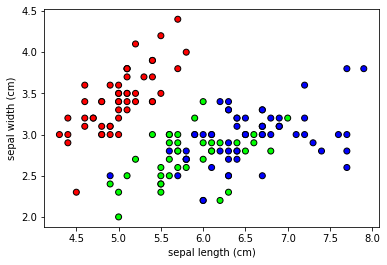

In [10]:
labels_names = iris.target_names
xid, yid = 0, 1

le = LabelEncoder()
encoded_labels = le.fit_transform(iris.target_names)

plt.scatter(x[:,xid],x[:,yid],c=y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel(iris.feature_names[xid])
plt.ylabel(iris.feature_names[yid])

In [11]:
seed = 1000
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)

In [12]:
model = Sequential()
model.add(Dense(8,activation='relu',input_shape = (4,)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

2022-07-19 12:02:01.209878: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
history = model.fit(x_train, 
                    y_train,
                    epochs = 200,
                    batch_size = 16,
                    verbose=0,
                    validation_data=(x_val,y_val))

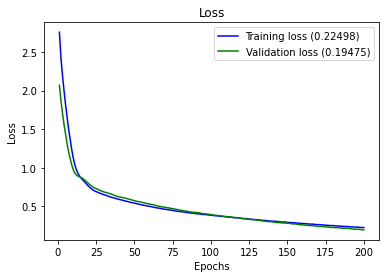

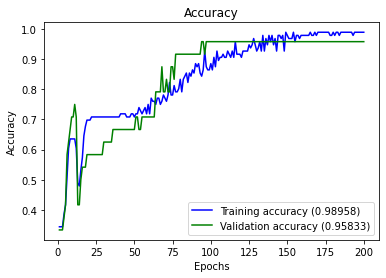

In [15]:
plot_history(history)

In [17]:
def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='rmsprop'):
    model = Sequential()

    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
            model.add(Dense(lsize,
                            activation=activation,
                            input_shape=(4,)))
        else:
            model.add(Dense(lsize,
                            activation=activation))

In [18]:
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)

In [19]:
model = KerasClassifier(build_fn=create_model,
                        epochs=10, 
                        batch_size=5,
                        verbose=0)

/tmp/ipykernel_44890/3318684957.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,


In [21]:
param_grid = {'dense_layers': [[4],[8],[8,8]],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[10,50],
              'batch_size':[5,16]}

In [22]:
grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')

In [28]:
grid_results = grid.fit(x_train,y_train)

/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-pack

AttributeError: 'NoneType' object has no attribute 'loss'

In [25]:
## First redefine y as categorical variable
y = to_categorical(iris.target,3)

In [26]:
## Rebuild the training and test set with the categorical y
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)


In [27]:
## Capture the best params
params = grid_results.best_params_

NameError: name 'grid_results' is not defined